## Week2_문소연_복습과제
### 핸즈온 머신러닝 `Ch3. 분류`

In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# sklearn의 iris 데이터를 이용해 분류를 하는 과제입니다.
아래 코드는 iris 데이터를 분류해 iris_dataset에 저장하는 코드이므로 그대로 돌려주시면 됩니다.

In [3]:
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

from sklearn.datasets import load_iris
iris_dataset = load_iris()

### iris_dataset의 keys를 확인하시오. 

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다.
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.

- 힌트: X는 iris_dataset["data"], y는 iris_dataset["target"]

- random_state = 42

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25, random_state=42)

### X_train의 크기와 y_train의 크기를 확인하시오.

In [6]:
X_train.shape
# len(X_train)

(112, 4)

In [7]:
y_train.shape
# len(y_train)

(112,)

### sklearn의 KNeighborsClassifier 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- n_neighbors=1
- 트레인 데이터 셋 : X_train, y_train

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=1) 
# n_neighbors 옵션을 지정해줌(k-근접 분류에서 'k'를 의미)으로써 분류의 기준 잡아줌. 
# 일반적으로 k가 커질수록 이상치의 영향을 덜 받으나 분류가 잘 안 이루어질 수 있음.

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [9]:
X_new = np.array([[5, 2.9, 1, 0.2]])

knn_clf.predict(X_new)

array([0])

### sklearn의 SVC 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- gamma="auto", random_state=42
- 트레인 데이터 셋 : X_train, y_train

In [10]:
from sklearn.svm import SVC
svm_clf=SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [11]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 

svm_clf.predict(X_new)

array([0])

### decision_function()을 호출해 각 클래스의 점수 확인하고 위와 일치하는지 보기.

In [12]:
svm_class_scores=svm_clf.decision_function(X_new)
svm_class_scores

# 0번째 클래스가 점수가 가장 높음을 알 수 있음.

array([[ 2.23354508,  0.81977305, -0.1792457 ]])

### np.argmax()를 통해 최댓값의 인덱스 확인하기.

In [13]:
np.argmax(svm_class_scores)

# 이 역시 상단의 결과 값과 일치함.

0

### SVC 기반으로 OvR 전략 사용하는 다중 분류 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- from sklearn.multiclass import OneVsRestClassifier
- 옵션: SVC(gamma="auto", random_state=42)
- 트레인 데이터 셋 : X_train, y_train

In [14]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [15]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 

ovr_clf.predict(X_new)

array([0])

### 아래는 랜덤 포레스트 분류기 생성 코드입니다. 그냥 돌려주세요!

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(random_state=1)


### cross_val_score로 rf 모델의 score list를 생성하고 프린트 하시오.
- cv=5 설정
- 트레인 데이터 셋 : X_train, y_train

In [17]:
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

array([0.95652174, 0.95652174, 0.81818182, 1.        , 0.95454545])

### corss_val_predict 함수로 예측을 하시오.
- from sklearn.model_selection import cross_val_predict

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(rf, X_train, y_train, cv=5)

### y_train과 y_train_pred의 confusion_matrix를 출력하시오.

In [19]:
from sklearn.metrics import confusion_matrix

cf_mx = confusion_matrix(y_train, y_train_pred)
cf_mx

array([[35,  0,  0],
       [ 0, 35,  4],
       [ 0,  3, 35]], dtype=int64)

### y_train과 y_train_pred의 정밀도와 재현율을 출력하시오. 
- 각각 average='micro'설정

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average='micro')

# precision_score에는 average 옵션이 'None', 'micro', 'macro' 총 세 개가 있음.
# 'None': 라벨 별 각 평균
# 'micro': 전체 평균
# 'macro': 라벨 별 각 합의 평균

0.9375

In [21]:
recall_score(y_train, y_train_pred, average='micro')

0.9375

# titanic.csv를 이용한 분류도 진행해 보겠습니다. 

In [22]:
# 타이타닉 파일 읽어오기
titanic = pd.read_csv('titanic.csv')

### train 데이터의 head()를 살펴보시오.

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 필요없는 변수를 제거하시오. ("PassengerID", "Name", "Ticket","Cabin")

In [24]:
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# 여러 번 실행하면 에러 뜰 수 있음.(이전 run 과정에서 이미 삭제하였음!)

### Nan 값이 있는 행을 삭제하시오.

In [25]:
titanic.dropna(inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 명목변수에 대한 encoding을 하시오. 

In [26]:
titanic=pd.get_dummies(titanic, columns=['Pclass'])
titanic=pd.get_dummies(titanic, columns=['Sex'], drop_first=True)
titanic=pd.get_dummies(titanic, columns=['Embarked'])

titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,1


### 타이타닉 데이터의 종속변수를 분리해, X_titanic과 y_titanic으로 저장하시오

In [27]:
X_titanic = titanic.drop(['Survived'], axis=1)
y_titanic = titanic['Survived']

In [28]:
X_titanic.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,1,0,0,1


In [29]:
y_titanic.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다. 
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.
- random_state = 42

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.25, random_state=42)

### StandardScaler를 사용해서 데이터를 정규화 하시오.
- 정규화 대상 : X_train, X_test

- X_train은 fit_transform()을 X_test는 transform()을 사용하시오.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### sklearn.linear_model의 LogisticRegression으로 모델 생성하시오.

In [32]:
from sklearn.linear_model import LogisticRegression

logis=LogisticRegression()
logis.fit(X_train_scaled, y_train)

LogisticRegression()

### train세트 (X_train, y_train)의 정확도를 구하시오.

In [33]:
# 교차 검증을 통한 정확도는 아님.
# 기본적으로 '모델.score'라는 api는 기본적으로 모델의 정확도 평가를 위한 mean accuracy를 계산해주는 함수이다.

logis.score(X_train_scaled, y_train)

0.8052434456928839

### test세트 (X_test, y_test)의 정확도를 구하시오.

In [34]:
logis.score(X_test_scaled, y_test)

0.7752808988764045

###  cross_val_predict 로 y 예측값을 구한후, 오차 행렬 생성하시오.
- cv=3

In [35]:
y_train_pred_logis=cross_val_predict(logis, X_train_scaled, y_train, cv=3)

cf_mx2=confusion_matrix(y_train, y_train_pred_logis)
cf_mx2

array([[273,  52],
       [ 58, 151]], dtype=int64)

### ROC 곡선을 그리시오.

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_logis)

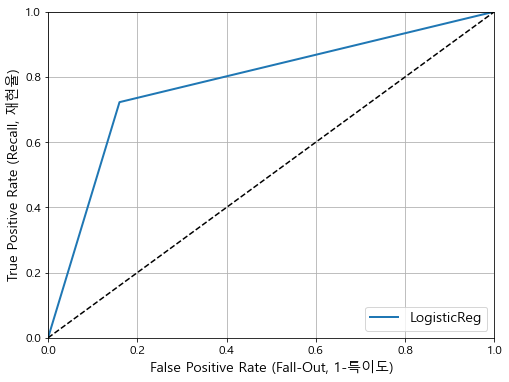

In [43]:
# 그래프의 축 이름과 범례를 한글로 넣겠다는 의지
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 그래프
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out, 1-특이도)', fontsize=14) 
    plt.ylabel('True Positive Rate (Recall, 재현율)', fontsize=14)
    plt.legend(loc='lower right', fontsize=14)                        # 범례를 표시하고 싶어서 한참 찾음. legend() 활성화되어야 표시됨!    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, label='LogisticReg')                                            
plt.show()

ROC 그래프가 꺾은 선으로 출력되는 것이 맞을까요...?

과제가 깔끔하게 출제되어서 내용 정리하는 데에 도움이 많이 되었습니다.
감사합니다!